<a href="https://colab.research.google.com/github/finesketch/data_science/blob/main/Python_Data_Science_Handbook/05_Machine_Learning_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

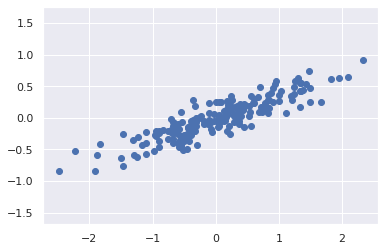

In [93]:
rng = np.random.RandomState(1)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200)).T

plt.scatter(X[:,0], X[:,1])
plt.axis('equal');

In [94]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [95]:
print(pca.components_)

[[-0.94446029 -0.32862557]
 [-0.32862557  0.94446029]]


In [96]:
print(pca.explained_variance_)

[0.7625315 0.0184779]


0.7625315008826115
[-0.94446029 -0.32862557]
0.018477895513562572
[-0.32862557  0.94446029]


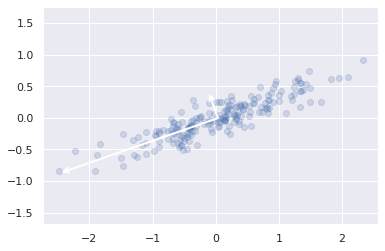

In [97]:
def draw_vector(v0, v1, ax=None):
  ax = ax or plt.gca()
  arrowprops = dict(arrowstyle='->', linewidth=2, shrinkA=0, shrinkB=0)
  ax.annotate('', v1, v0, arrowprops=arrowprops)

plt.scatter(X[:,0], X[:,1], alpha=0.2)

for length, vector in zip(pca.explained_variance_, pca.components_):
  print(length)
  print(vector)

  v = vector * 3 * np.sqrt(length)
  draw_vector(pca.mean_, pca.mean_ + v)

plt.axis('equal');

**PCA as dimensionality reduction**

In [98]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print('original shape', X.shape)
print('transformed shape', X_pca.shape)

# The transformed data has been reduced to a single dimension.

original shape (200, 2)
transformed shape (200, 1)


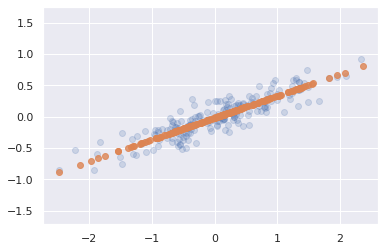

In [99]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:,0], X[:,1], alpha=0.2)
plt.scatter(X_new[:,0], X_new[:,1], alpha=0.8)
plt.axis('equal');

# the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance. 


**PCA for visualization: Handwritten digits**

In [100]:
from sklearn.datasets import load_digits

digits = load_digits()
digits.data.shape

# Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional.

(1797, 64)

In [101]:
pca = PCA(n_components=2) # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)


(1797, 64)
(1797, 2)


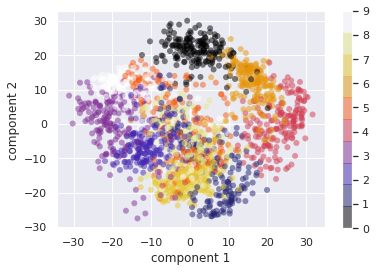

In [102]:
plt.scatter(projected[:,0], projected[:,1], c=digits.target, edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('CMRmap', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

**What do the components mean?**

PCA can be thought of as a process of choosing optimal basis functions, such that adding together just the first few of them is enough to suitably reconstruct the bulk of the elements in the dataset. 

PCA discovers a set of basis functions that are more efficient than the native pixel-basis of the input data.

**Choosing the number of components**

We can determine this by looking at the cumulative explained variance ratio as a function of the number of components



Text(0, 0.5, 'cumulative explained variance')

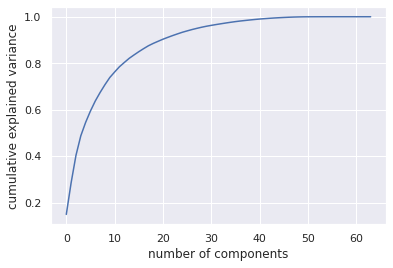

In [103]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

This curve quantifies how much of the total, 64-dimensional variance is contained within the first  components. For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

In [104]:
explained_variance = pca.explained_variance_ratio_

In [105]:
explained_variance

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [106]:
cumsum = np.cumsum(pca.explained_variance_ratio_)

In [107]:
cumsum

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

In [108]:
#np.concatenate((explained_variance, cumsum))
np.dstack((explained_variance, cumsum))

array([[[1.48905936e-01, 1.48905936e-01],
        [1.36187712e-01, 2.85093648e-01],
        [1.17945938e-01, 4.03039586e-01],
        [8.40997942e-02, 4.87139380e-01],
        [5.78241466e-02, 5.44963527e-01],
        [4.91691032e-02, 5.94132630e-01],
        [4.31598701e-02, 6.37292500e-01],
        [3.66137258e-02, 6.73906226e-01],
        [3.35324810e-02, 7.07438707e-01],
        [3.07880621e-02, 7.38226769e-01],
        [2.37234084e-02, 7.61950177e-01],
        [2.27269657e-02, 7.84677143e-01],
        [1.82186331e-02, 8.02895776e-01],
        [1.77385494e-02, 8.20634325e-01],
        [1.46710109e-02, 8.35305336e-01],
        [1.40971560e-02, 8.49402492e-01],
        [1.31858920e-02, 8.62588384e-01],
        [1.24813782e-02, 8.75069763e-01],
        [1.01771796e-02, 8.85246942e-01],
        [9.05617439e-03, 8.94303117e-01],
        [8.89538461e-03, 9.03198501e-01],
        [7.97123157e-03, 9.11169733e-01],
        [7.67493255e-03, 9.18844665e-01],
        [7.22903569e-03, 9.2607370

**PCA as Noise Filtering**

PCA can also be used as a filtering approach for noisy data.



digits.data.shape: (1797, 64)


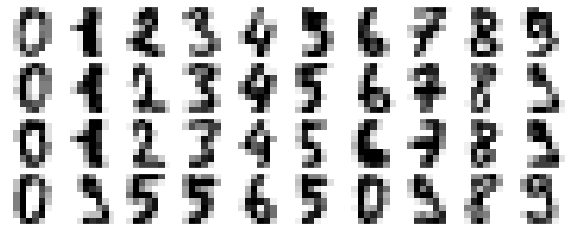

In [109]:
def plot_digits(data):
  fig, axes = plt.subplots(4, 10, figsize=(10,4), subplot_kw={'xticks':[], 'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

  for i, ax in enumerate(axes.flat):
    #print(f'data[i].shape: {data[i].shape}')
    ax.imshow(data[i].reshape(8,8), cmap='binary', interpolation='nearest', clim=(0,16))


plot_digits(digits.data)
print(f'digits.data.shape: {digits.data.shape}')

noisy.shape: (1797, 64)


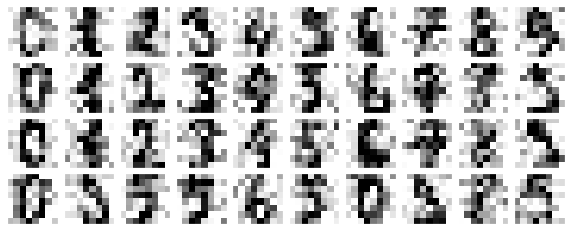

In [110]:
# add some random noise to create a noisy dataset
# https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html

np.random.seed(42)
noisy = np.random.normal(loc=digits.data, scale=4)
#noisy = np.random.normal(loc=digits.data, scale=8)
plot_digits(noisy)

print(f'noisy.shape: {noisy.shape}')


In [111]:
# https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

# Let’s train a PCA on the noisy data, requesting that the projection preserve 50% of the variance
pca = PCA(0.50).fit(noisy)
pca.n_components_ # very cool to be able doing it this way

# Here 50% of the variance amounts to 12 principal components. 

12

transformed_components.shape: (1797, 12)
filtered.shape: (1797, 64)


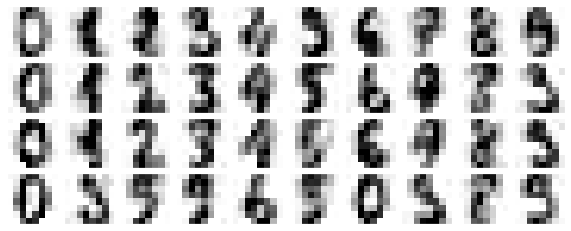

In [112]:
# use "pca.transform(a)" to retrieve the reduced dataset
transformed_components = pca.transform(noisy) # (1797, 12)
print(f'transformed_components.shape: {transformed_components.shape}')

# then use "pca.inverse_transform" to inverse the above to re-create the whole datasets
filtered = pca.inverse_transform(transformed_components) # (1797, 64)
print(f'filtered.shape: {filtered.shape}')

plot_digits(filtered)


**Example: Eigenfaces**



In [113]:
from sklearn.datasets import fetch_lfw_people

faces = fetch_lfw_people(min_faces_per_person=60)
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


Let’s take a look at the principal axes that span this dataset. Because this is a large dataset, we will use **RandomizedPCA** — it contains a randomized method to approximate the first  principal components much more quickly than the standard PCA estimator, and thus is very useful for high-dimensional data (here, a dimensionality of nearly 3,000). 

In [114]:
#from sklearn.decomposition import RandomizedPCA
# ImportError: cannot import name 'RandomizedPCA' from 'sklearn.decomposition' (/usr/local/lib/python3.7/dist-packages/sklearn/decomposition/__init__.py)

from sklearn.decomposition import PCA as RandomizedPCA

#pca = RandomizedPCA(150)
pca = RandomizedPCA(n_components=150, svd_solver='randomized', whiten=True)
#pca = RandomizedPCA(n_components=10, svd_solver='randomized', whiten=True)
pca.fit(faces.data)


PCA(copy=True, iterated_power='auto', n_components=150, random_state=None,
    svd_solver='randomized', tol=0.0, whiten=True)

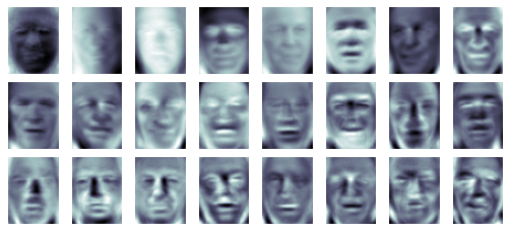

In [115]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4), subplot_kw={'xticks':[],'yticks':[]}, gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
  ax.imshow(pca.components_[i].reshape(62,47), cmap='bone')


Let’s take a look at the cumulative variance of these components to see how much of the data information the projection is preserving

Text(0, 0.5, 'cumulative explained variance')

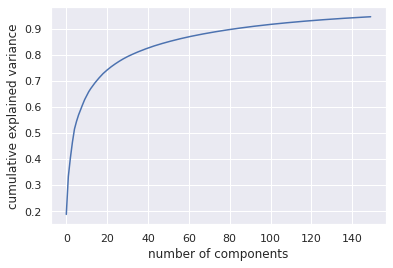

In [116]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

# We see that these 150 components account for just over 90% of the variance. That would lead us to believe that using these 150 components, we would recover most of the essential characteristics of the data.


In [117]:
# Compute the components and projected faces
pca = RandomizedPCA(n_components=150).fit(faces.data)
#pca = RandomizedPCA(n_components=10).fit(faces.data)

components = pca.transform(faces.data)
print(f'components.shape: {components.shape}')

projected = pca.inverse_transform(components)
print(f'projected.shape: {components.shape}')

components.shape: (1348, 150)
projected.shape: (1348, 150)


Text(0, 0.5, '150-dim\n-re-construction')

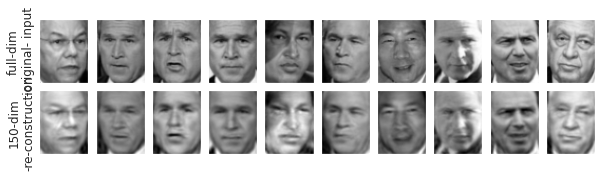

In [118]:
fig, axes = plt.subplots(2, 10, figsize=(10,2.5), subplot_kw={'xticks':[],'yticks':[]}, gridspec_kw=dict(hspace=0.1,wspace=0.1))

for i in range(10):
  axes[0,i].imshow(faces.data[i].reshape(62,47), cmap='binary_r')
  axes[1,i].imshow(projected[i].reshape(62,47), cmap='binary_r')

axes[0,0].set_ylabel('full-dim\n-original- input')
axes[1,0].set_ylabel('150-dim\n-re-construction')
#axes[1,0].set_ylabel('10-dim\n-re-construction')

#The top row here shows the input images, while the bottom row shows the reconstruction of the images from just 150 of the ~3,000 initial features.


**Principal Component Analysis Summary**

In this section we have discussed the use of principal component analysis for dimensionality reduction, for visualization of high-dimensional data, for noise filtering, and for feature selection within high-dimensional data. Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines. Given any high-dimensional dataset, I tend to start with PCA in order to visualize the relationship between points (as we did with the digits), to understand the main variance in the data (as we did with the eigenfaces), and to understand the intrinsic dimensionality (by plotting the explained variance ratio). Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

PCA’s main weakness is that it tends to be highly affected by outliers in the data. For this reason, many robust variants of PCA have been developed, many of which act to iteratively discard data points that are poorly described by the initial components. Scikit-Learn contains a couple interesting variants on PCA, including RandomizedPCA and SparsePCA, both also in the sklearn.decomposition submodule. RandomizedPCA, which we saw earlier, uses a nondeterministic method to quickly approximate the first few principal components in very high-dimensional data, while SparsePCA introduces a regularization term (see “In Depth: Linear Regression”) that serves to enforce sparsity of the components.

Reference: https://learning.oreilly.com/library/view/python-data-science/9781491912126/ch05.html#in-depth-manifold-learning